## Polynomial Rgression 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 

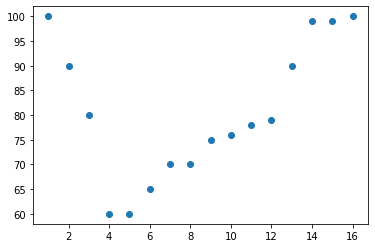

In [2]:
X=[i for i in range(1,17)] # 1 -- > 18 
y=[100,90,80,60,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(X,y)
plt.show()

In [3]:
np.array(X).shape

(16,)

In [4]:
np.array(X).reshape(-1,1).shape


(16, 1)

In [5]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()

In [6]:
model.fit(np.array(X).reshape(-1,1),y)

LinearRegression()

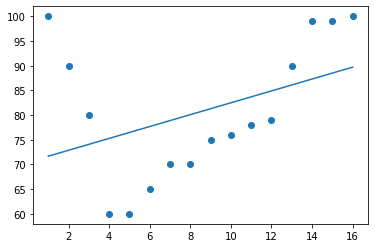

In [7]:
plt.scatter(X,y)
plt.plot(X,model.predict(np.array(X).reshape(-1,1)))
plt.show()

In [8]:
np.polyfit(X,y,4) 

array([ 3.94563190e-03, -2.01829635e-01,  3.78629212e+00, -2.65362132e+01,
        1.25408654e+02])

In [9]:
ploynomialModel=np.poly1d(np.polyfit(X,y,4))

In [10]:
ploynomialModel(X)

array([102.46084881,  85.92988906,  74.74683953,  67.93746031,
        64.62220668,  64.01622906,  65.42937307,  68.26617945,
        72.02588414,  76.30241823,  80.78440799,  85.25517484,
        89.59273537,  93.76980134,  97.85377967, 102.00677245])

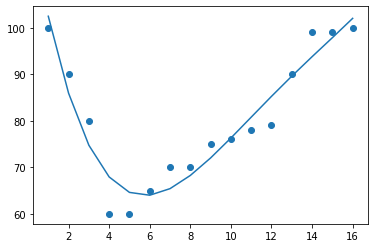

In [11]:
plt.scatter(X,y)
plt.plot(X,ploynomialModel(X))
plt.show()

Houses preice 

In [12]:
data=pd.read_csv('Automobile_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
data.replace('?',np.nan,inplace=True)

In [14]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [15]:
data.duplicated().any()

False

### Handling Missing Value

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [17]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [18]:
data['normalized-losses']=data['normalized-losses'].replace(np.nan,data['normalized-losses'].median()).astype(float)

In [19]:
data['normalized-losses'].unique()

array([115., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
        93., 142., 161., 153., 125., 128., 122., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [22]:
data['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [23]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [24]:
data['num-of-doors']=data['num-of-doors'].fillna('four')

In [25]:
data['stroke']=data['stroke'].replace(np.nan,data['stroke'].median()).astype(float)
data['bore']=data['bore'].replace(np.nan,data['bore'].median()).astype(float)

In [26]:
data['peak-rpm']=data['peak-rpm'].replace(np.nan,data['peak-rpm'].median()).astype(float)
data['horsepower']=data['horsepower'].replace(np.nan,data['horsepower'].median()).astype(float)

In [27]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [28]:
data.dropna(inplace=True)


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [30]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [31]:
data['num-of-doors']=data['num-of-doors'].replace({'four':4,'two':2})

In [32]:
data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [33]:
data['num-of-cylinders']=data['num-of-cylinders'].replace({'four':4,'two':2,'five':5,'eight':8,'twelve':12,'six':6,'three':3})

In [34]:
data['num-of-cylinders']=data['num-of-cylinders'].astype(float)
data['num-of-doors']=data['num-of-doors'].astype(float)
data['price']=data['price'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    float64
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    float64
 16  engine-size        201 non

### Feature Selection 

In [35]:
data.corr()


,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.457735,-0.672344,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.118016,-0.110581,-0.142547,-0.004387,-0.182196,0.075486,0.279897,-0.035527,0.036233,-0.082391
normalized-losses,0.457735,1.000000,-0.355303,-0.075109,-0.009116,0.061799,-0.371830,0.065393,0.080549,0.073586,-0.052094,0.046024,-0.115967,0.182479,0.245899,-0.193896,-0.150773,0.094366
num-of-doors,-0.672344,-0.355303,1.000000,0.445245,0.395122,0.227655,0.538383,0.208517,0.002225,0.024094,0.120915,-0.010194,0.169164,-0.102504,-0.232247,-0.027617,-0.045787,0.042435
wheel-base,-0.535987,-0.075109,0.445245,1.000000,0.876024,0.814507,0.590742,0.782097,0.348931,0.572027,0.494065,0.156740,0.250313,0.372156,-0.360946,-0.470606,-0.543304,0.584642
length,-0.365404,-0.009116,0.395122,0.876024,1.000000,0.857170,0.492063,0.880665,0.440348,0.685025,0.609557,0.123016,0.159733,0.578683,-0.285301,-0.665192,-0.698142,0.690628
width,-0.242423,0.061799,0.227655,0.814507,0.857170,1.000000,0.306002,0.866201,0.520118,0.729436,0.544986,0.188605,0.189867,0.614146,-0.245273,-0.633531,-0.680635,0.751265
height,-0.550160,-0.371830,0.538383,0.590742,0.492063,0.306002,1.000000,0.307581,0.007776,0.074694,0.182946,-0.064380,0.259737,-0.086078,-0.310513,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.065393,0.208517,0.782097,0.880665,0.866201,0.307581,1.000000,0.604454,0.849072,0.644434,0.166809,0.156433,0.757961,-0.279429,-0.749543,-0.794889,0.834415
num-of-cylinders,-0.118016,0.080549,0.002225,0.348931,0.440348,0.520118,0.007776,0.604454,1.000000,0.847639,0.205936,0.008480,-0.018138,0.669385,-0.152422,-0.439432,-0.473746,0.708645
engine-size,-0.110581,0.073586,0.024094,0.572027,0.685025,0.729436,0.074694,0.849072,0.847639,1.000000,0.574504,0.203043,0.028889,0.822167,-0.256503,-0.650546,-0.679571,0.872335


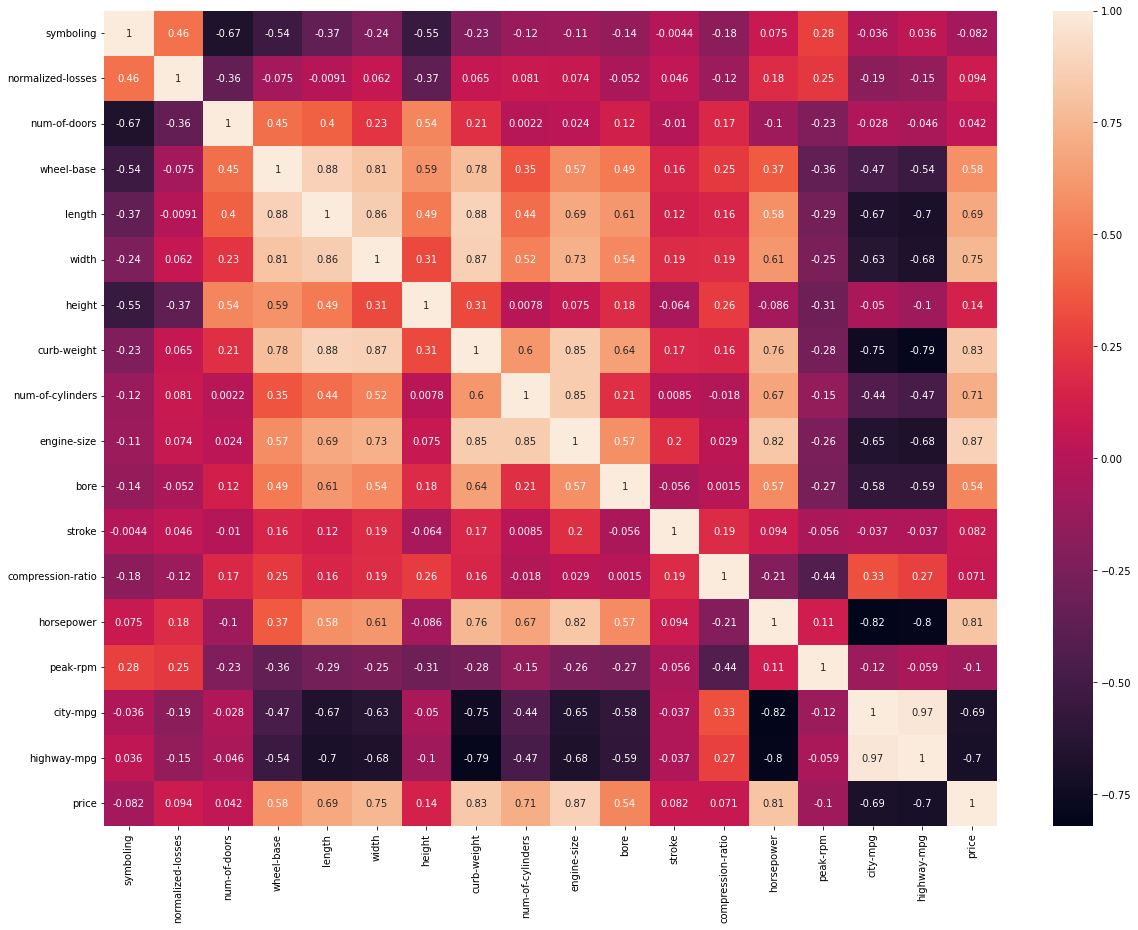

In [36]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

correlation [-1,1]

1 -- > high positive correlation

-1 --> high negative correlation 

0- --> no correlation 

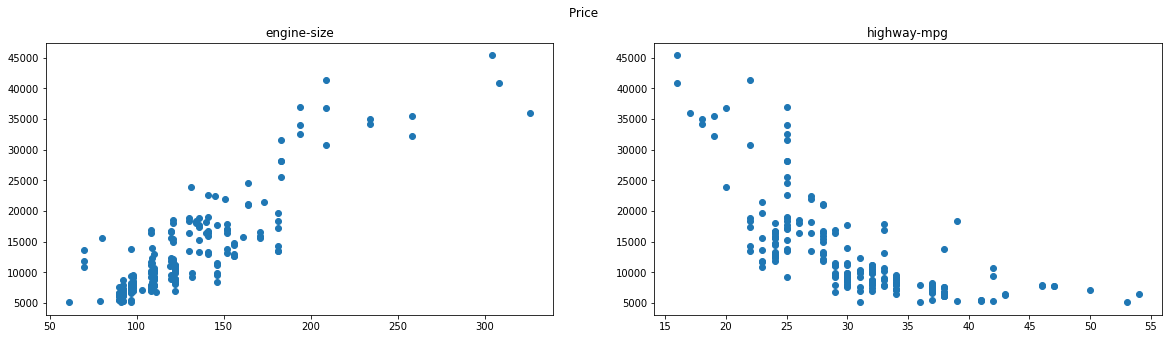

In [37]:
features=['engine-size','highway-mpg']
target=data['price']
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)

x=data[features[0]]
y=target
ax1.scatter(x,y,marker='o')
ax1.set_title("engine-size")
x=data[features[1]]
y=target
ax2.scatter(x,y,marker='o')
ax2.set_title("highway-mpg")
fig.suptitle("Price ")
plt.show()

Handle Categorical Values

In [38]:
y=data['price']
data=pd.get_dummies(data.iloc[:,:-1],drop_first=True)

In [39]:
data['Price']=y.values
data.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,Price
0,3,115.0,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,...,0,0,0,0,0,0,1,0,0,13495.0
1,3,115.0,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,...,0,0,0,0,0,0,1,0,0,16500.0
2,1,115.0,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,...,1,0,0,0,0,0,1,0,0,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,...,0,0,0,0,0,0,1,0,0,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,...,0,0,0,0,0,0,1,0,0,17450.0
